# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [ ]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [ ]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [10]:
hospital_read_df.describe()


,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [11]:
hospital_read_df.shape
hospital_read_df.isnull().sum()


Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [13]:
missing=hospital_read_df[hospital_read_df['Number of Discharges']=='Not Available']
missing.isnull().sum()


Hospital Name                    0
Provider Number                  0
State                            0
Measure Name                     0
Number of Discharges             0
Footnote                      2234
Excess Readmission Ratio      3048
Predicted Readmission Rate    3048
Expected Readmission Rate     3048
Number of Readmissions        5282
Start Date                       0
End Date                         0
dtype: int64

In [14]:
new=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
new.shape

(11578, 12)

In [15]:
new=new[new['Number of Readmissions'].notnull()]


In [16]:
new.head()


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [17]:
new['Number of Discharges']=pd.to_numeric(new['Number of Discharges'])
new.isnull().sum()


Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [18]:
new.head()
new.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [19]:
#Correlation of number of discharges with Excess Readmission rate
r1=-0.097398

In [20]:
r_squared=r1**2
r_squared


0.009486370404

In [21]:
new.shape[0]

11497

In [22]:
#The total number of hospitals is 11497.

In [23]:
n1=11497

In [24]:

t1=(r1*((n1-2)/(1-r1**2))**0.5)
t1

-10.492386957113085

In [25]:
df1=n1-2
df1

11495

In [26]:
import scipy.stats as stats
p_value1 = stats.t.sf(np.abs(t1), df1)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value1

1.2224686234119185e-25

In [27]:
#Based on the p value there is as significat correlation between hospital capacity and excess readmission ratio.
#The number of discharges and excessive readmission rates has negative but small correlation.

In [28]:
# The statistical significance for .01 will be the same as for .05 because p_value will be calculated the same way and assumed  will not be part of p_value calculation.

In [29]:
#Statistical significance means that difference in groups is likely not due to sampling error.
#Pratical signficance refers to finding meaning in the difference of two groups.
#In this scenario pratical and statistical significance vary.

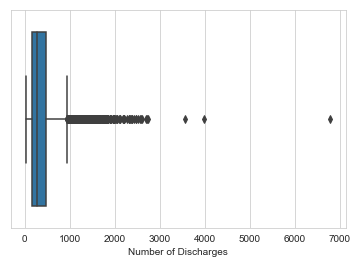

In [30]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x=new['Number of Discharges'])

In [31]:
new.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


In [32]:
bigcap=new[new['Number of Discharges']>1000]
bigcap.shape[0]

463

In [33]:
B1=bigcap[bigcap['Excess Readmission Ratio']>1]
B1.shape[0]

206

In [34]:
B2=bigcap[bigcap['Excess Readmission Ratio']<=1]
B2.shape[0]

257

In [35]:
hosp1=new[new['Excess Readmission Ratio']<=1]
hosp2=new[new['Excess Readmission Ratio']>1]

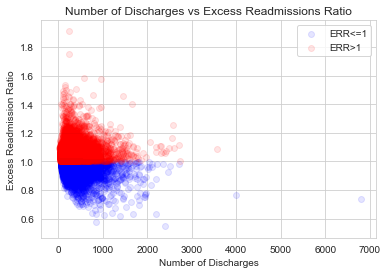

In [37]:
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='b', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

In [39]:
P1=5558/(5558+5939)
P1


0

In [40]:
P2=5939/(5558+5939)
P2

0

In [41]:
mean_dis_diff=381.295250-350.652635
mean_dis_diff

30.642615000000035

In [42]:
std_dis_diff=np.sqrt((322.753963**2/5558) + (294.309313**2/5939))
std_dis_diff

5.772952495085433

In [43]:
moe=1.96*std_dis_diff
moe

11.314986890367448

In [44]:
ci = mean_dis_diff + np.array([-1, 1]) * moe
ci

array([19.32762811, 41.95760189])

In [45]:
n1=5558
n2=5939
H1=(322.753963**2)/n1
H2=(294.309313**2)/n2

DF=((H1+H2)**2)/(((H1**2)/n1)+((H2**2)/n2))
DF

11217.039092559779

In [46]:
t_val=(mean_dis_diff-0)/std_dis_diff
t_val

5.307962437952914

In [47]:
p_value = stats.t.sf(np.abs(t_val), DF)*2  # two-sided pvalue
p_value

1.1297252848786862e-07

In [48]:
#There is significant difference between number of discharges for hospitals with exess readmission ratio of less than or equal to 1 and those with excess readmission ratio greater than 1.

In [49]:
moe_2=3.32*std_dis_diff
moe_2

19.16620228368364

In [50]:
ci_2 = mean_dis_diff + np.array([-1, 1]) * moe_2
ci_2

array([11.47641272, 49.80881728])

In [51]:
#The advantages of this plot are it is clear what it's trying to convey.
#The correlation is difficult to see is the main disadvantage.

In [52]:
from scipy import stats  
x=new['Number of Discharges']
y=new['Excess Readmission Ratio']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)


(-2.90105173305707e-05, 1.018106147373357, -0.09739794351079356, 1.2225473776733694e-25, 2.7649127349110583e-06)


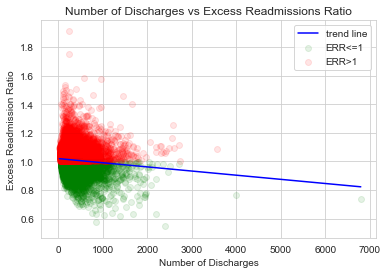

In [53]:
X=new['Number of Discharges'].sort_values()
y_trend=(-2.901e-05)*X + 1.02
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.plot(X, y_trend, c='b', label='trend line')

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()